In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input

In [2]:
import tensorflow as tf
devices = tf.config.experimental.get_visible_devices('GPU')
tf.config.experimental.set_memory_growth(device=devices[0], enable = True)

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

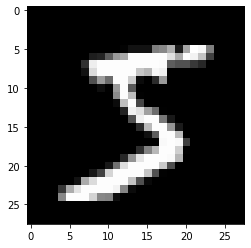

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gray')

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train.shape

(60000, 28, 28, 1)

# Model

In [8]:
input_layer = Input(shape = (28,28,1))

# encoder
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_layer)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

# decoder
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation = 'relu', padding = 'same')(x)

In [9]:
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [10]:
# compile
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [11]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size = 128, validation_data=(X_test,X_test))

Epoch 1/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2217 - val_loss: 0.2181
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1938 - val_loss: 0.1777
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1955 - val_loss: 0.1885
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1960 - val_loss: 0.2260
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1843 - val_loss: 0.2366
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1952 - val_loss: 0.1719
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1738 - val_loss: 0.1637
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1768 - val_loss: 0.2117
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1661 - val_loss: 0.1606
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1623 - val_loss: 0.1537

In [12]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [13]:
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [17]:
decoder_layer = Input(shape = (4,4,8))

decoder = autoencoder.layers[7](decoder_layer)

for layer in autoencoder.layers[8:]:
    decoder = layer(decoder)

decoder = Model(decoder_layer, decoder, name = 'Decoder')
decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4, 4, 8)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0   

In [19]:
# encoder images for testing
encoded_images = encoder.predict(X_test, verbose = 1)
encoded_images.shape

313/313 [==============================] - 0s 1ms/step


(10000, 4, 4, 8)

In [20]:
decoded_images = decoder.predict(encoded_images, verbose=1)
decoded_images.shape

313/313 [==============================] - 0s 2ms/step


(10000, 28, 28, 1)

In [21]:
decoded_images = decoded_images.reshape(decoded_images.shape[0], 28,28)
decoded_images.shape

(10000, 28, 28)

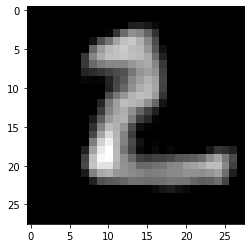

In [25]:
plt.imshow(decoded_images[1], cmap = 'gray')

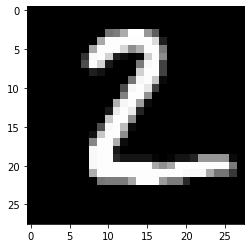

In [24]:
X_test = X_test.reshape(X_test.shape[0], 28,28)
plt.imshow(X_test[1], cmap = 'gray')